# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

    100% |████████████████████████████████| 563kB 8.6MB/s 
  Running setup.py bdist_wheel for citipy ... done
  Stored in directory: /root/.cache/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy
mkl-devel 2018.0.3 has requirement mkl==2018.0.3, but you'll have mkl 2019.0 which is incompatible.
menpo 0.8.1 has requirement matplotlib<2.0,>=1.4, but you'll have matplotlib 2.2.3 which is incompatible.
menpo 0.8.1 has requirement pillow<5.0,>=3.0, but you'll have pillow 5.2.0 which is incompatible.
menpo 0.8.1 has requirement scipy<1.0,>=0.16, but you'll have scipy 1.1.0 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# Define API Key
api_key = api_keys.api_key

# URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [20]:
# Create empty lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# call counter 
record = 1



# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop
for city in cities:  
    
    # Try statement to append calls
    try: 
        response = requests.get(f"{base_url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
      

        record= record + 1 
        
    # If no record found "skip" to next call
    except:
        print("Missing field/result... skipping.")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Nikolskoye
Missing field/result... skipping.
Processing Record 2 | Fuzhou
Processing Record 3 | Sikasso
Processing Record 4 | Mataura
Processing Record 5 | Bluff
Processing Record 6 | Jamestown
Processing Record 7 | Bethel
Processing Record 8 | Mae Hong Son
Processing Record 9 | Ushuaia
Processing Record 10 | Qaanaaq
Processing Record 11 | Esperance
Processing Record 12 | Tasiilaq
Processing Record 13 | Carnarvon
Processing Record 14 | Norman Wells
Processing Record 15 | Ukiah
Processing Record 16 | Kapaa
Processing Record 17 | Cape Town
Processing Record 18 | Soyo
Processing Record 19 | New Norfolk
Processing Record 20 | Vestmannaeyjar
Processing Record 21 | Yellowknife
Processing Record 22 | Shieli
Processing Record 23 | Saint-Philippe
Processing Record 24 | Hakkari
Processing Record 25 | Port Blair
Processing Record 26 | Hit
Processing Record 27 | Rikitea
Processing Record 28 | Ileza
Processing Record 29 

In [21]:
# # List for holding lat_lngs and cities
# city_data = []
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
# counter=1
# for city in cities:
#     print(city)
#     city_url = url + "&q=" + city[0] + ',' + city[1]
#     #print(city_url)
#     print(counter)
#     print(f'City: {city[0]}')
#     counter =  counter +1
#     print('------')
    
#     try:
#         city_weather = requests.get(city_url).json() # extract data and save it as json 
        
#         # Parse out the max temp, humidity, and cloudiness 
#         # from the json extract the info 
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_date = city_weather["dt"]
        
#         # saving the extracted data in a dic 
#         city_weather = {"Lat"       : city_lat,
#                         "Lng"       : city_lng,
#                         "Max Temp"  : city_max_temp,
#                         "Humidity"  : city_humidity,
#                         "Cloudiness": city_clouds,
#                         "Wind Speed": city_wind,
#                         "Date"      : city_date}

#         # Append the City information into dictionary t0 city_data list
        
#         city_data.append(city_weather)
        

#     except:
#         print("Beginning Data Retrieval")
#         pass
# print('Done')

In [22]:
# Creating dictionary
column_names = {"City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

In [24]:
# Create Dataframe
city_weather_data = pd.DataFrame(column_names)

# Count to make sure all rows are filled
city_weather_data.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [11]:
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "Imperial"
# count = 0
# samplecity['latitude'] = ""
# samplecity['longitude'] = ""
# samplecity['temperature'] = ""
# samplecity['humidity'] = ""
# samplecity['cloudiness'] = ""
# samplecity['wind_speed'] = ""

# for index,row in samplecity.iterrows():
#     count+= 1
#     query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['city']
#     try:
#         weather_response = req.get(query_url)
#         cityweather = weather_response.json()
# #         print(cityweather)
#         samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
#         samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
#         samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
#         samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
#         samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
#         samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
#     except:
#         print(f"No data for this city: {row['city']}")
#     print(f"This is city#: {count}")
#     print(f"This is: {row['city']}" )
#     print(f"This is the requested URL: {query_url}")

In [26]:
# # create a df from the city_data list 
# city_df = pd.DataFrame(city_data)
# city_df

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:

# Count to make sure all rows are filled
city_weather_data.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [28]:
# Saving to a CSV file
city_weather_data.to_csv('weather_data_CSV.csv')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [38]:
import datetime as dt
time.strftime("%Y-%m-%d")
dt.fromtimestamp(1539143760)

AttributeError: module 'datetime' has no attribute 'fromtimestamp'

AttributeError: module 'datetime' has no attribute 'now'

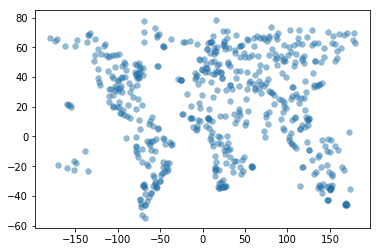

In [32]:
# Scatter plot for the selected coordinates  
plt.scatter(city_weather_data.Lng, 
            city_weather_data.Lat,
            edgecolor='black', linewidths=.15, marker="o", 
            alpha=0.5, label="Weather Cities")

# Incorporate the other graph properties
#plt.title("Selected LATS & LNGS")
plt.title(f"City Latitude vs. Humidity {dt.now().strftime('%m/%d/%Y')}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=3, fancybox=True, shadow=True)
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

NameError: name 'datetime' is not defined

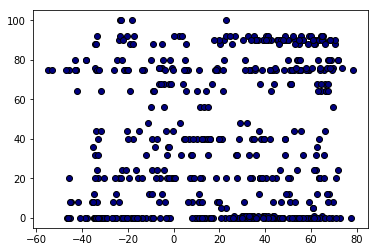

In [33]:
x_axis = city_weather_data['Lat']
y_axis = city_weather_data['Cloudiness']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title(f"City Latitude vs. Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Images/LatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Cloudiness Plot

NameError: name 'datetime' is not defined

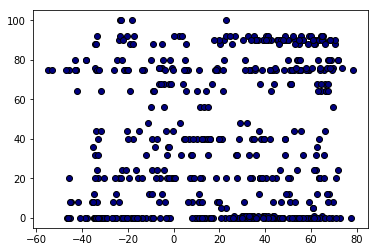

In [34]:
x_axis = city_weather_data['Lat']
y_axis = city_weather_data['Cloudiness']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title(f"City Latitude vs. Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Images/LatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

NameError: name 'datetime' is not defined

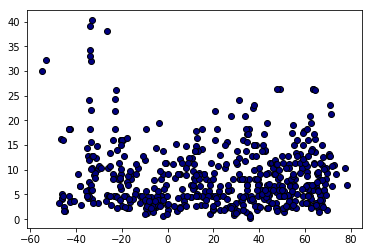

In [36]:
x_axis = city_weather_data['Lat']
y_axis = city_weather_data['Wind Speed']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Images/LatitudeVsWindSpeed.png")
plt.show()